In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
v_df = pd.read_csv('../data/photometry_v_13s.csv', index_col='slice')
b_df = pd.read_csv('../data/photometry_b_13s.csv', index_col='slice')

In [3]:
v_data = v_df[['Source_AMag_T1','Source_AMag_T2','Source_AMag_T3','Source_AMag_T4']]
v_err = v_df[['Source_AMag_Err_T1', 'Source_AMag_Err_T2', 'Source_AMag_Err_T3', 'Source_AMag_Err_T4']]

In [4]:
b_data = b_df[['Source_AMag_T1','Source_AMag_T2','Source_AMag_T3']]
b_err = b_df[['Source_AMag_Err_T1', 'Source_AMag_Err_T2', 'Source_AMag_Err_T3']]

In [5]:
def wa(vals, errs):
    a = np.sum(vals/errs**2)
    b = np.sum(1/errs**2)
    return a/b

def wstd(vals, mean):
    sse = np.sum((vals-mean)**2)
    return np.sqrt(1/(vals.size-1)*sse)



10.189350373786166 +- 0.01876502253476543
7.969605125955281 +- 0.007462868249796376
9.539517498201883 +- 0.01022144776141383
8.939281449135184 +- 0.7262599413944995


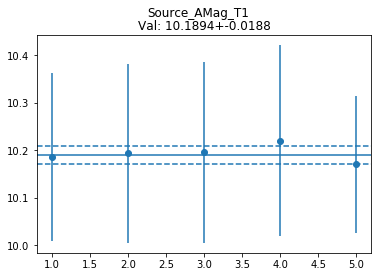

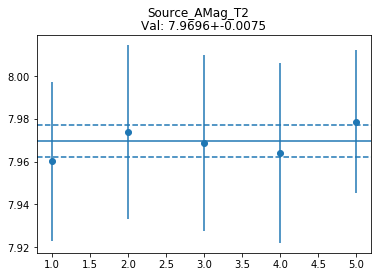

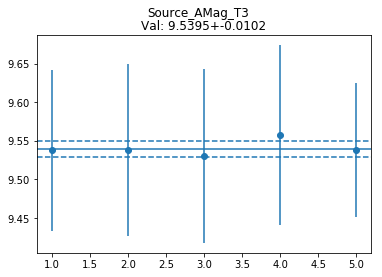

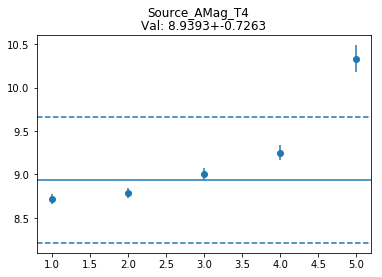

In [6]:
for dc, ec in zip(v_data.columns, v_err.columns):
    plt.figure()
    plt.errorbar(v_data.index, v_data[dc], yerr=v_err[ec], fmt='o')
    w = np.average(v_data[dc], weights=1/v_err[ec]**2)
    s = wstd(v_data[dc], w)
    plt.axhline(w)
    plt.axhline(w+s, ls='--')
    plt.axhline(w-s, ls='--')
    plt.suptitle(dc)
    plt.title('Val: {:.4f}+-{:.4f}'.format(w, s))
    print('{} +- {}'.format(w, s))

10.394108007867462 +- 0.05576954480729908
8.026382567548566 +- 0.0015632387154058157
9.669279765991291 +- 0.02360252655701595


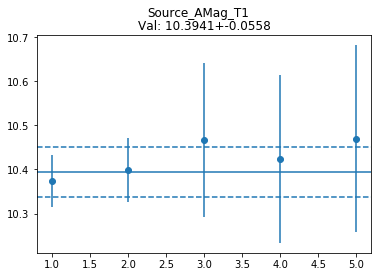

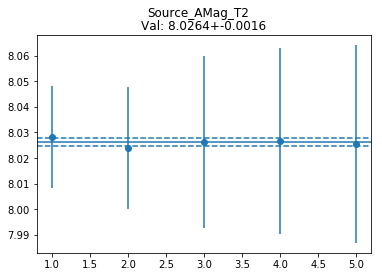

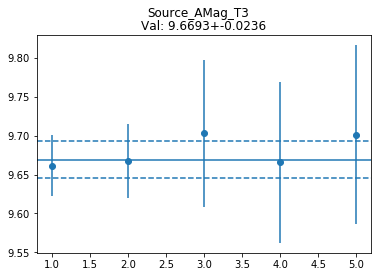

In [7]:
for dc, ec in zip(b_data.columns, b_err.columns):
    plt.figure()
    plt.errorbar(b_data.index, b_data[dc], yerr=b_err[ec], fmt='o')
    w = np.average(b_data[dc], weights=1/b_err[ec]**2)
    s = wstd(b_data[dc], w)
    plt.axhline(w)
    plt.axhline(w+s, ls='--')
    plt.axhline(w-s, ls='--')
    plt.suptitle(dc)
    plt.title('Val: {:.4f}+-{:.4f}'.format(w, s))
    print('{} +- {}'.format(w, s))